In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (replace 'data.csv' with your actual filename)
df = pd.read_excel("data.xlsx")  

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
# Check basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].fillna(0)  # Replace NaN with 0
df['CustomerID'] = df['CustomerID'].replace([np.inf, -np.inf], 0)  # Replace inf with 0
df['CustomerID'] = df['CustomerID'].astype(int)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  536641.000000                         536641  536641.000000   
mean        9.620029  2011-07-04 08:57:06.087421952       4.632656   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:52:00       1.250000   
50%         3.000000            2011-07-19 14:04:00       2.080000   
75%        10.000000            2011-10-18 17:05:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       219.130156                            NaN      97.233118   

          CustomerID  
count  536641.000000  
mean    11435.904653  
min         0.000000  
25%         0.000000  
50%     14336.000000  
75%     16241.000000  
max     18287.000000  
std      6795.044250  


In [7]:
# Unique products count
print("\nNumber of Unique Products:", df['StockCode'].nunique())

# Unique customers count
print("Number of Unique Customers:", df['CustomerID'].nunique())

# Total transactions
print("Total Transactions:", df['InvoiceNo'].nunique())


Number of Unique Products: 4070
Number of Unique Customers: 4373
Total Transactions: 25900


In [8]:
# Top 10 best-selling products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
print(top_products)


Top 10 Best-Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64


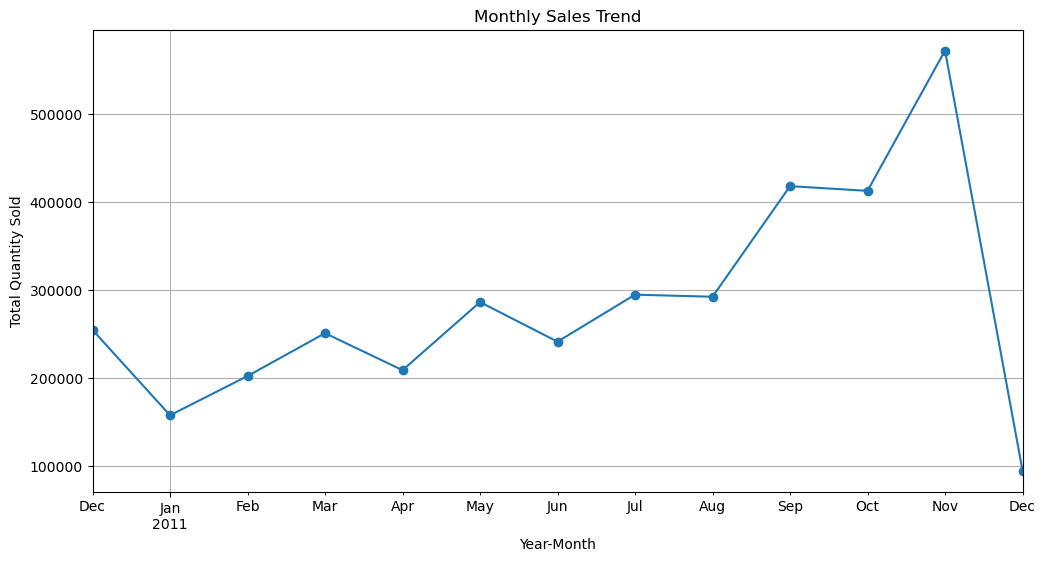

In [9]:

# Downcast numeric columns
df['Quantity'] = pd.to_numeric(df['Quantity'], downcast='integer')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove outliers
q99 = df['Quantity'].quantile(0.99)
df_filtered = df[df['Quantity'] <= q99]

# Monthly Sales Trend
monthly_sales = df_filtered.groupby(df_filtered['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity Sold")
plt.grid()
plt.show()

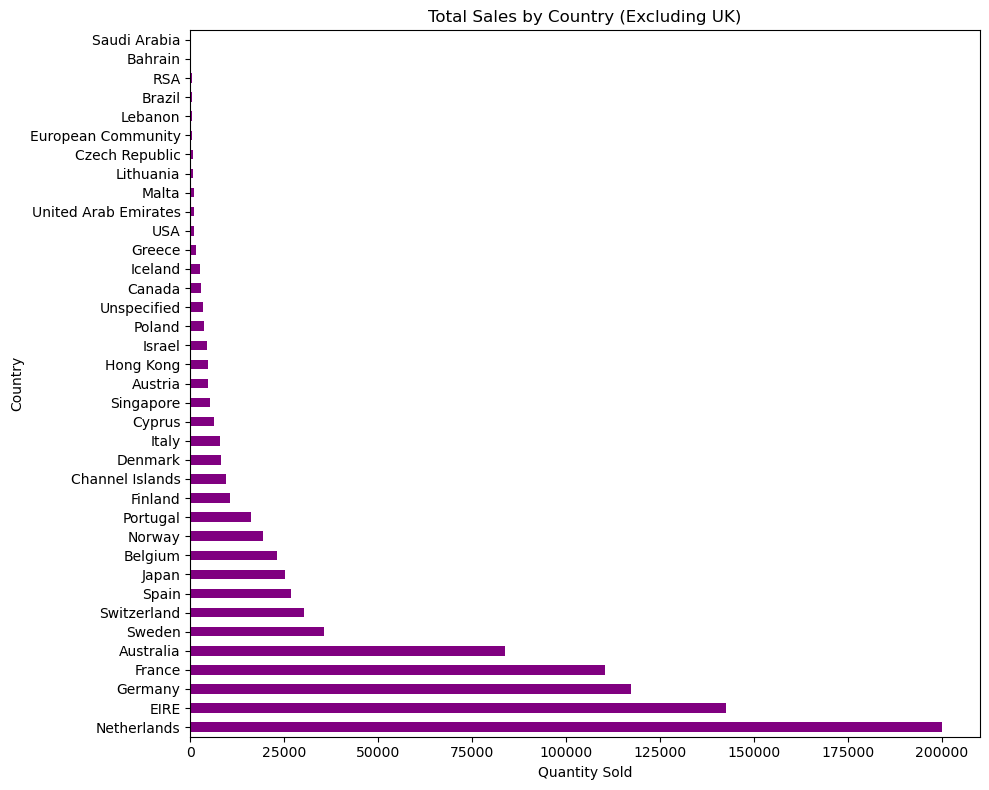

In [11]:
country_sales = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_sales = country_sales[country_sales.index != "United Kingdom"]
plt.figure(figsize=(10, 8))
country_sales.plot(kind="barh", color="purple")  
plt.title("Total Sales by Country (Excluding UK)")
plt.xlabel("Quantity Sold")
plt.tight_layout()
plt.show()